<a href="https://colab.research.google.com/github/gudals6676/HTML-CSS/blob/main/00_keras_%EB%A7%9B%EB%B3%B4%EA%B8%B0(%ED%95%99%EC%83%9D_%EC%88%98%ED%95%99_%EC%84%B1%EC%A0%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 학생 수학 성적을 예측하는 회귀 모델을 만들어보자!
- keras를 이용하여 신경망을 구성하는 방법을 연습해보자!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# 데이터가 ;으로 구분된 파일을 로드
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/빅데이터4차_딥러닝/data/student-mat.csv",
                   delimiter = ";")
# delimiter : csv파일에서 구분자를 설정해주는 명령
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [4]:
data.shape

(395, 33)

- 문제, 정답 분리

In [5]:
# 문제는 studytime, 정답은 G3로 설정해주세요~!
X = data["studytime"] # 문제
y = data["G3"]        # 정답

In [6]:
X.shape, y.shape

((395,), (395,))

- 학습, 평가 분리

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,  #문제
                                                    y, #정답
                                                    test_size = 0.3,
                                                    random_state=3
                                                   )

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276,)
(119,)
(276,)
(119,)


In [10]:
import warnings
warnings.filterwarnings(action="ignore")

신경망 모델 만들기
- 1.신경망 구조 설계
- 2.신경망 학습/평가 방법설정
- 3.학습 및 학습과정 시각화
- 4.모델평가

In [11]:
# 1. 신경망 구조 설계
# Sequential : 신경망의 뼈대를 구축하기 위한 모듈
from tensorflow.keras import Sequential
# inputLayer : 신경망의 입력층을 생성
# Dense : 신경망의 중간층(은닉층), 출력층을 구성해주는 모듈
from tensorflow.keras.layers import InputLayer, Dense

In [12]:
# 신경망의 뼈대를 설정
model = Sequential()

# 입력층 설정
# add : 신경망 뼈대에 층을 쌓아주는 명령
# input_shape : 입력 데이터의 특성 형태를 설정(1개의 특성)
model.add(InputLayer(input_shape=(1,)))

# 출력층 설정
# Dense : 하나의 층을 쌓아주는 명령
# Dense ()안의 숫자는 해당 층에 생성해줄 뉴런의 개수
model.add(Dense(1))

# 설계된 신경망의 정보를 요약해서 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 2. 신경망 학습/평가 방법 설정
model.compile(loss = 'mse',         # 손실함수(비용함수) : MSE(성적을 구하는 회귀 모데일이기 때문)
              optimizer = 'SGD'     # 최적화함수 : 경사하강법의 방법을 설정(SGD : 확률적 경사하강법)
              )

In [14]:
# 3. 학습
h = model.fit(X_train, y_train, epochs=100)
# epochs : 학습 횟수를 설정

Epoch 1/100
9/9 [==============================] - 1s 1ms/step - loss: 107.5239
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 37.0733
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 28.2271
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 26.8831
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 26.5295
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 26.1773
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 25.9764
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 25.7238
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 25.5298
Epoch 10/100
9/9 [==============================] - 0s 1ms/step - loss: 25.3563
Epoch 11/100
9/9 [==============================] - 0s 1ms/step - loss: 25.1128
Epoch 12/100
9/9 [==============================] - 0s 1ms/step - loss: 24.9715
Epoch 13/100
9/9 [==============================

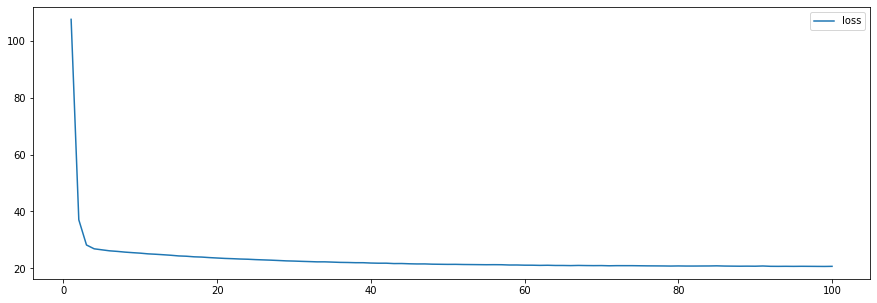

In [15]:
# 4.학습과정 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 101, 1),     # epochs를 100까지 설정했기 때문에 1, 101
         # history : 학습시 출력되는 loss함수 혹은 정확도값을 보기 위한 명령
         h.history['loss'],
         label='loss'
         ) 
plt.legend()
plt.show()

- 초반에는 빠르게 MSE(loss함수)가 떨어지고 있네?
- 경사하강법 초반에는 가중치(w), 절편(b) 값이 임의의 값으로 설정되어 있기 때문에 mse가 높았고 조금만 학습시켜보니 빠르게 mse가 줄어드는 것을 볼 수 있다.

In [16]:
# 5. 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 21.3355


21.335519790649414

### 입력 특성이 2개인 모델을 직접 만들어보자!
- 문제(입력틍성 2개 : studytime, traveltime) X1변수
- 정답(G3) y1변수
- 최종 출력층의 뉴런 개수는 1개

In [17]:
X1 = data[['studytime','traveltime']]  # 문제
y1 = data["G3"]                        # 정답

In [18]:
X1.shape, y1.shape

((395, 2), (395,))

In [35]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,  #문제
                                                    y1, #정답
                                                    test_size = 0.3,
                                                    random_state=3
                                                   )

In [36]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(276, 2)
(119, 2)
(276,)
(119,)


In [45]:
# 신경망의 뼈대를 설정
model1 = Sequential()

# 입력층 설정
# add : 신경망 뼈대에 층을 쌓아주는 명령
# input_shape : 입력 데이터의 특성 형태를 설정(1개의 특성)
model1.add(InputLayer(input_shape=(2,)))

# 출력층 설정
# Dense : 하나의 층을 쌓아주는 명령
# Dense ()안의 숫자는 해당 층에 생성해줄 뉴런의 개수
model1.add(Dense(1))

# 설계된 신경망의 정보를 요약해서 출력
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 2. 신경망 학습/평가 방법 설정
model1.compile(loss = 'mse',         # 손실함수(비용함수) : MSE(성적을 구하는 회귀 모데일이기 때문)
              optimizer = 'SGD'     # 최적화함수 : 경사하강법의 방법을 설정(SGD : 확률적 경사하강법)
              )

In [47]:
h2 = model1.fit(X1_train, y1_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 1ms/step - loss: 82.2756
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 29.4903
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 27.1064
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 26.8149
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 26.6631
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 26.4055
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 26.2276
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 26.0601
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 26.0189
Epoch 10/100
9/9 [==============================] - 0s 1ms/step - loss: 25.7940
Epoch 11/100
9/9 [==============================] - 0s 1ms/step - loss: 25.8523
Epoch 12/100
9/9 [==============================] - 0s 1ms/step - loss: 25.4933
Epoch 13/100
9/9 [==============================]

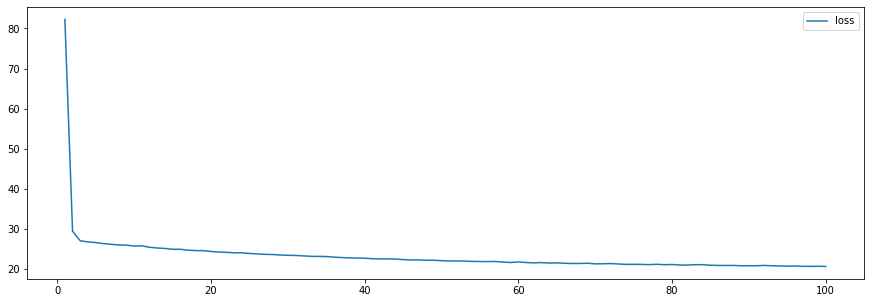

In [48]:
# 4.학습과정 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 101, 1),     # epochs를 100까지 설정했기 때문에 1, 101
         # history : 학습시 출력되는 loss함수 혹은 정확도값을 보기 위한 명령
         h2.history['loss'],
         label='loss'
         ) 
plt.legend()
plt.show()

In [50]:
model1.evaluate(X1_test, y1_test)

4/4 [==============================] - 0s 2ms/step - loss: 21.5757


21.575716018676758